<a href="https://colab.research.google.com/github/Dakshatha0/Cardiovascular-Disease-Detection-using-Machine-Learning/blob/master/Sample_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LOADING IMAGE**

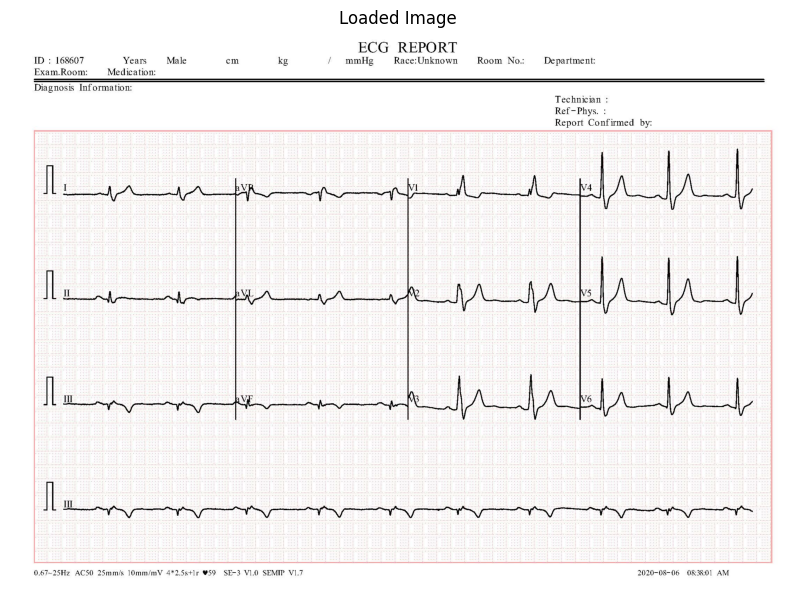

In [17]:
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.color import rgb2gray

# Load the image
image_path = '/content/Normal(6).jpg'
image = imread(image_path)

# Create a figure and axes
plt.figure(figsize=(10, 10))  # Adjust the figure size as needed

# Display the image
if len(image.shape) == 3 and image.shape[2] == 3:
    # Image is RGB color
    plt.imshow(image)
else:
    # Convert grayscale to RGB for display
    plt.imshow(image, cmap='gray')

# Add title and turn off axis
plt.title('Loaded Image')
plt.axis('off')

# Show the plot
plt.show()


**DIVIDE INTO LEADS**

In [20]:
# Define regions of interest for each ECG lead
Lead_1 = image[300:600, 150:643]     # Lead I
Lead_2 = image[300:600, 646:1135]    # Lead II
Lead_3 = image[300:600, 1140:1625]   # Lead III
Lead_4 = image[300:600, 1630:2125]   # Lead aVR
Lead_5 = image[600:900, 150:643]     # Lead aVL
Lead_6 = image[600:900, 646:1135]    # Lead aVF
Lead_7 = image[600:900, 1140:1625]   # Lead V1
Lead_8 = image[600:900, 1630:2125]   # Lead V2
Lead_9 = image[900:1200, 150:643]    # Lead V3
Lead_10 = image[900:1200, 646:1135]  # Lead V4
Lead_11 = image[900:1200, 1140:1625] # Lead V5
Lead_12 = image[900:1200, 1630:2125] # Lead V6
Lead_13 = image[1250:1480, 150:2125] # Additional lead (if applicable)

# Store all leads in a list
Leads = [Lead_1, Lead_2, Lead_3, Lead_4, Lead_5, Lead_6, Lead_7, Lead_8, Lead_9, Lead_10, Lead_11, Lead_12, Lead_13]

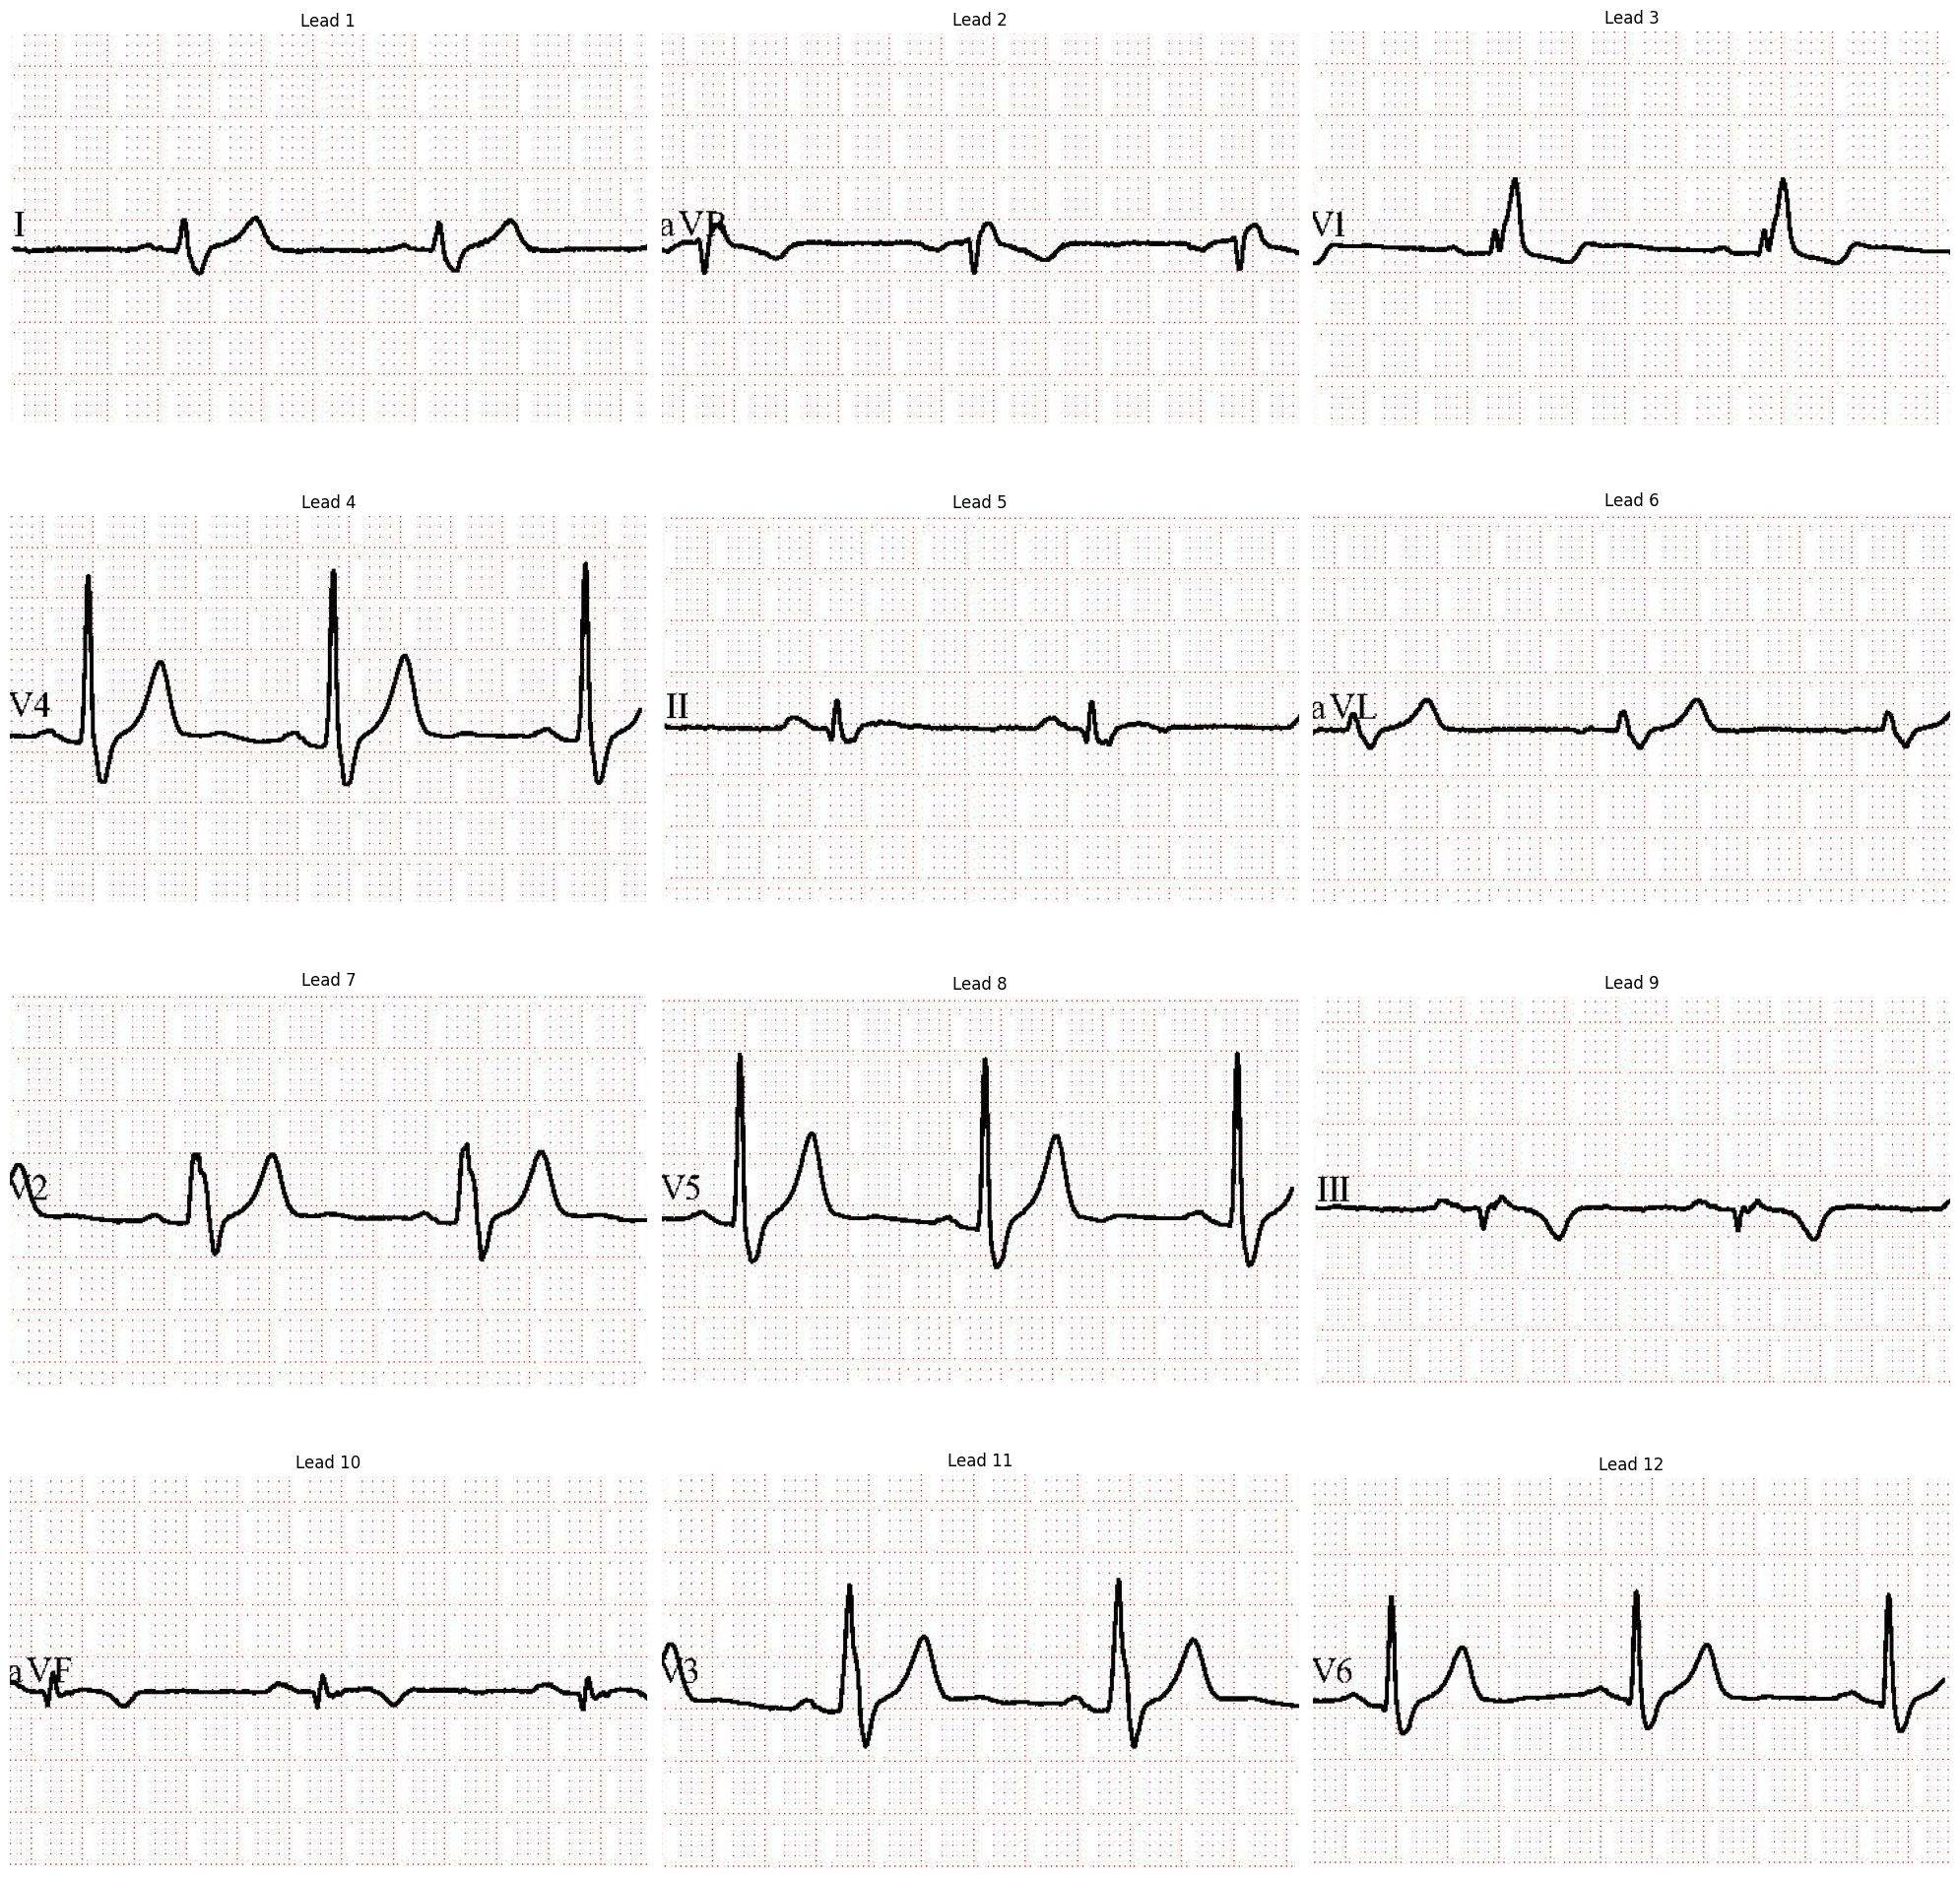

In [19]:
# Create a subplot grid dynamically based on the number of leads
num_leads = len(Leads) - 1  # Exclude the last lead if it's None
num_rows = (num_leads - 1) // 3 + 1  # Calculate the number of rows needed
num_cols = min(num_leads, 3)  # Maximum of 3 columns for visualization

# Create the subplot grid
fig, ax = plt.subplots(num_rows, num_cols)
fig.set_size_inches(20, 20)

# Flatten the axes array for easier iteration
ax = ax.flatten()

# Plot each lead in the subplot grid
for i in range(num_leads):
    if Leads[i] is not None:  # Check if lead data is available
        ax[i].imshow(Leads[i])
        ax[i].axis('off')
        ax[i].set_title("Lead {}".format(i + 1))

# Remove empty subplots (if any)
for j in range(num_leads, num_rows * num_cols):
    fig.delaxes(ax[j])

# Adjust layout to prevent overlap and improve spacing
fig.tight_layout()

# Show the plot
plt.show()


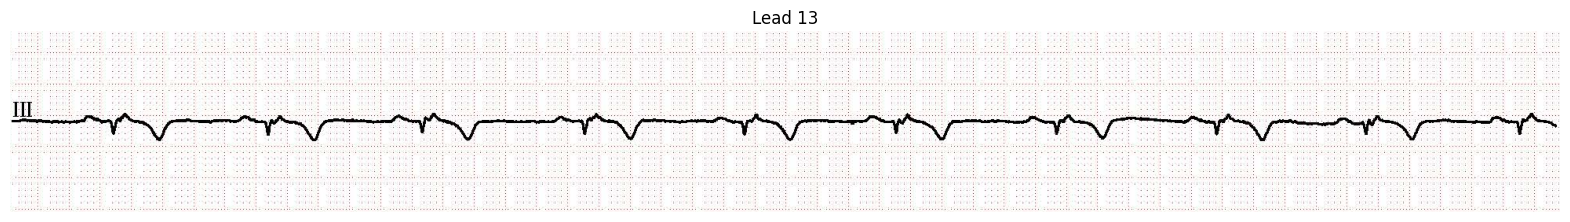

In [21]:
# Create a subplot for Lead 13
fig1, ax1 = plt.subplots()
fig1.set_size_inches(20, 20)

# Plot Lead 13
ax1.imshow(Lead_13)
ax1.set_title("Lead 13")
ax1.axis('off')

# Show the plot
plt.show()


**PERFORM PREPROCESSING**

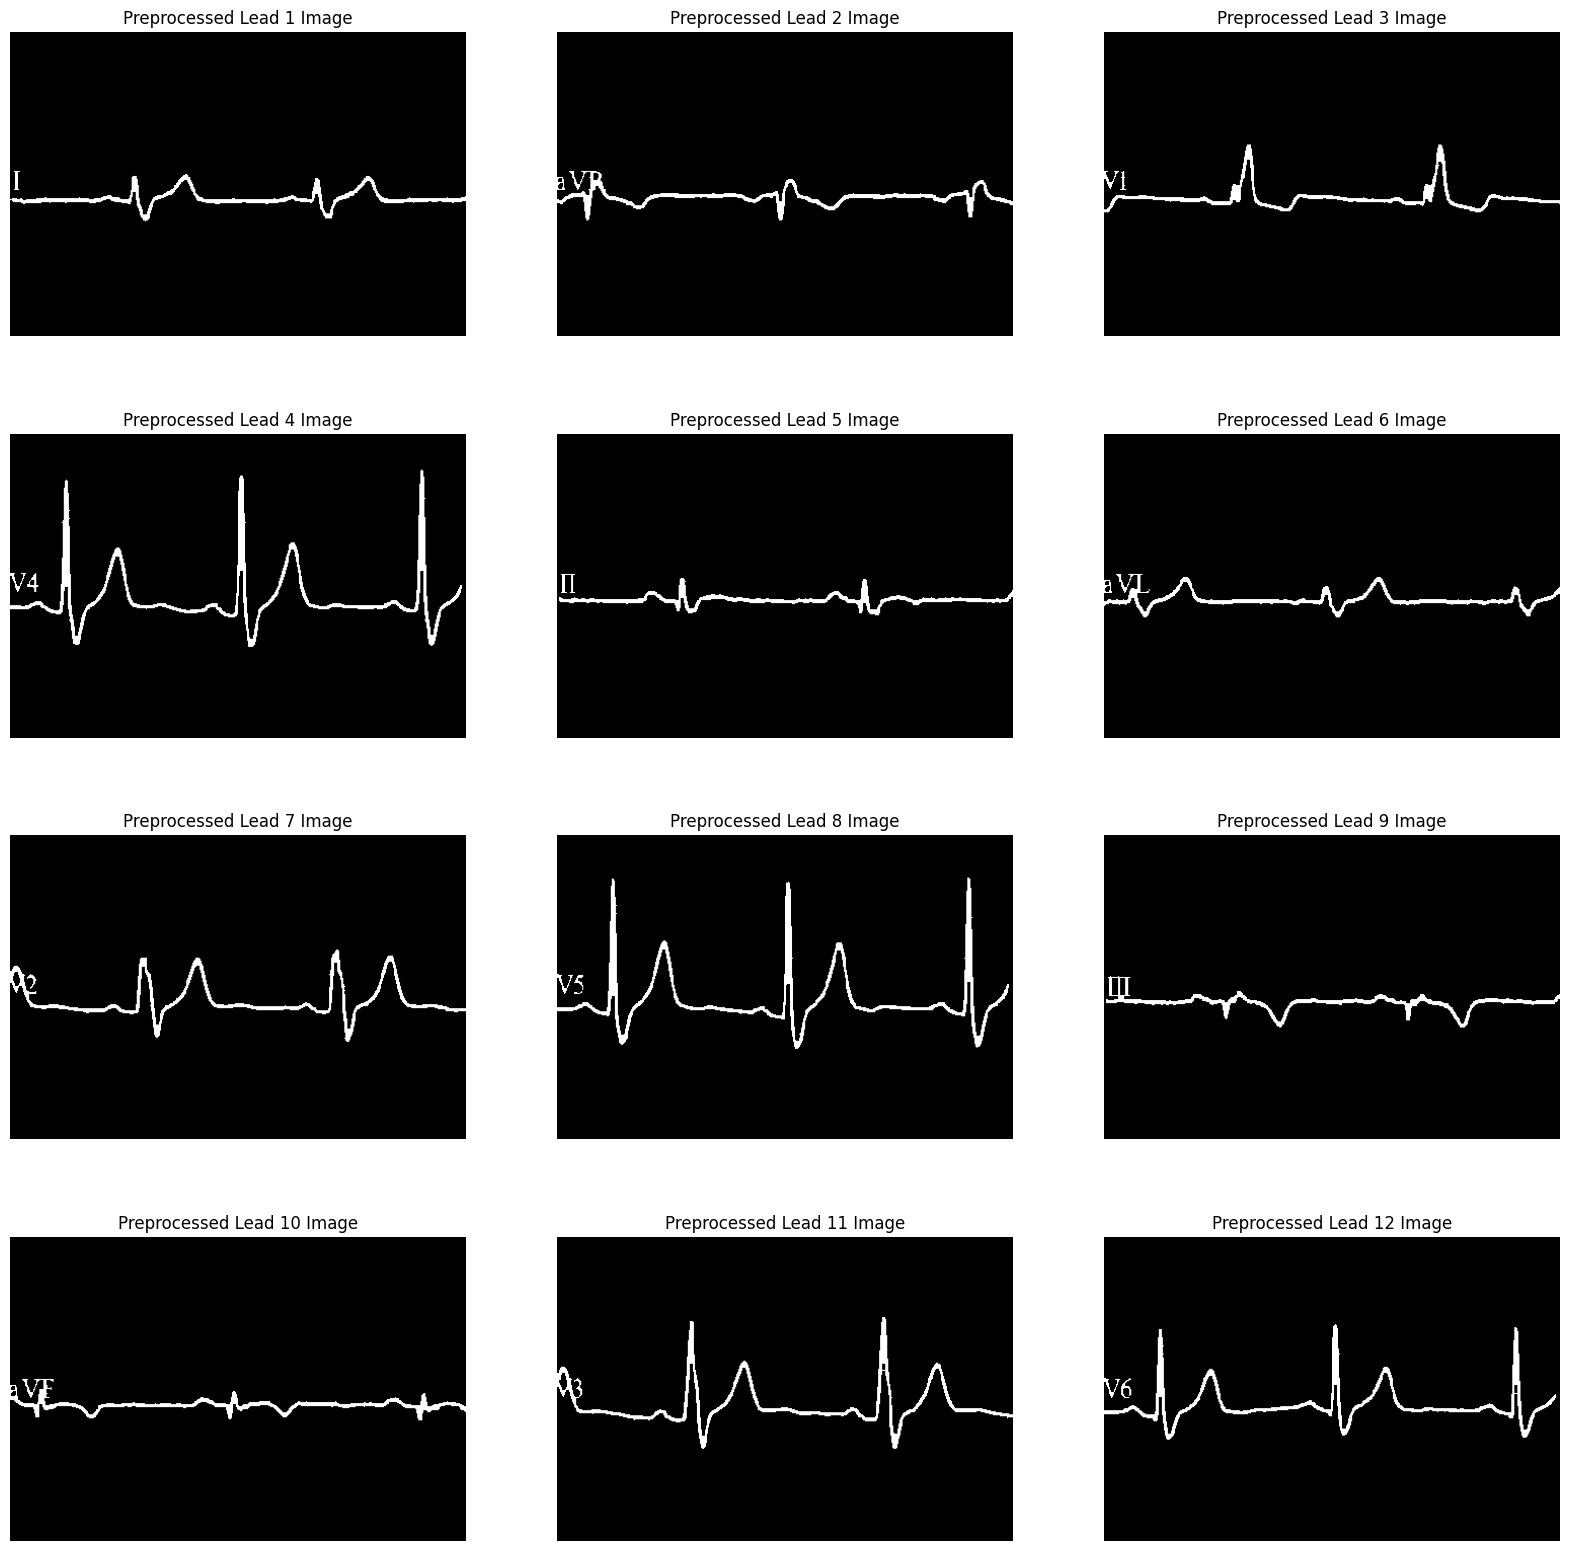

In [22]:
from skimage.filters import threshold_otsu, gaussian
from skimage.transform import resize
from skimage import exposure
from skimage.morphology import closing, square
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

# Creating subplot of size (4, 3) with 4 rows and 3 columns
fig2, ax2 = plt.subplots(4, 3)
fig2.set_size_inches(20, 20)

# Setting counters for plotting based on value
x_counter = 0
y_counter = 0

# Looping through image list containing all leads from 1-12
for x, y in enumerate(Leads[:len(Leads)-1]):
    # Convert to grayscale
    grayscale = rgb2gray(y)

    # Apply Gaussian smoothing
    blurred_image = gaussian(grayscale, sigma=0.7)

    # Apply Otsu thresholding to distinguish foreground and background
    global_thresh = threshold_otsu(blurred_image)
    binary_global = blurred_image < global_thresh

    # Resize the binary image for consistency
    binary_global = resize(binary_global, (300, 450))

    # Enhance contrast for better visualization (optional)
    enhanced_image = exposure.rescale_intensity(binary_global)

    # Apply morphological closing to remove small gaps in the binary image (optional)
    closed_image = closing(enhanced_image, square(3))

    # Plot the preprocessed image
    if (x + 1) % 3 == 0:
        ax2[x_counter][y_counter].imshow(closed_image, cmap="gray")
        ax2[x_counter][y_counter].axis('off')
        ax2[x_counter][y_counter].set_title("Preprocessed Lead {} Image".format(x + 1))
        x_counter += 1
        y_counter = 0
    else:
        ax2[x_counter][y_counter].imshow(closed_image, cmap="gray")
        ax2[x_counter][y_counter].axis('off')
        ax2[x_counter][y_counter].set_title("Preprocessed Lead {} Image".format(x + 1))
        y_counter += 1

# Plot the images
plt.show()


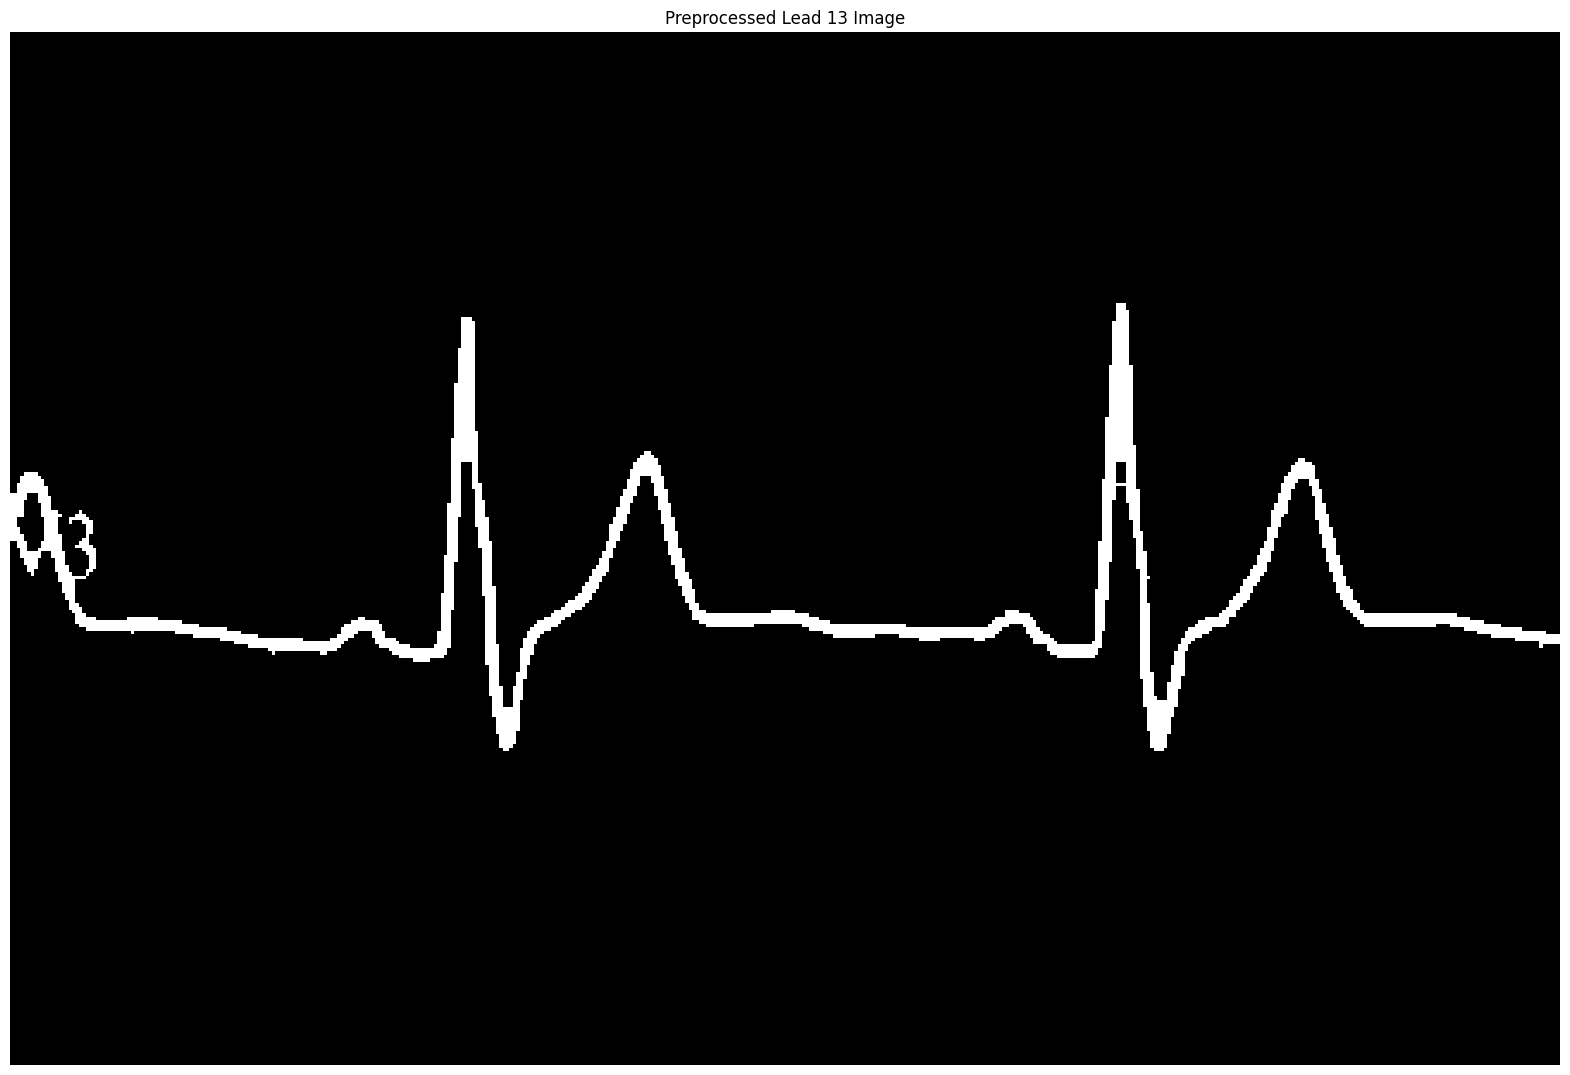

In [23]:
from skimage.filters import threshold_otsu, gaussian
from skimage.transform import resize
from skimage import exposure
from skimage.morphology import closing, square
from skimage import color
import matplotlib.pyplot as plt

# Plotting Lead 13 (Lead_11 in your case)
fig3, ax3 = plt.subplots()
fig3.set_size_inches(20, 20)

# Convert Lead 13 to grayscale
grayscale_lead_13 = color.rgb2gray(Lead_11)

# Apply Gaussian smoothing to Lead 13
blurred_lead_13 = gaussian(grayscale_lead_13, sigma=0.7)

# Apply Otsu thresholding to Lead 13
global_thresh_lead_13 = threshold_otsu(blurred_lead_13)

# Create binary image based on threshold for Lead 13
binary_global_lead_13 = blurred_lead_13 < global_thresh_lead_13

# Resize the binary image for consistency
binary_global_lead_13 = resize(binary_global_lead_13, (300, 450))

# Enhance contrast for better visualization (optional)
enhanced_lead_13 = exposure.rescale_intensity(binary_global_lead_13)

# Apply morphological closing to remove small gaps in the binary image (optional)
closed_lead_13 = closing(enhanced_lead_13, square(3))

# Plot the preprocessed Lead 13 image
ax3.imshow(closed_lead_13, cmap='gray')
ax3.set_title("Preprocessed Lead 13 Image")
ax3.axis('off')

# Show the plot
plt.show()


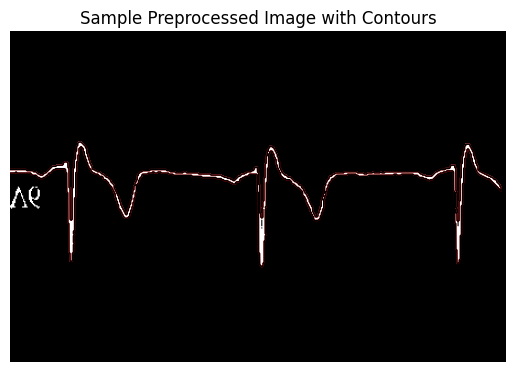

In [27]:
from skimage import measure, color
from skimage.transform import resize
import matplotlib.pyplot as plt

# Assuming 'binary_global' and 'ax4' are previously defined
# Finding contours in the binary image
contours = measure.find_contours(binary_global, 0.9)

# Determine the largest contour based on perimeter length
largest_contour = max(contours, key=len)

# Plotting the image with detected contour
fig4, ax4 = plt.subplots()
ax4.imshow(binary_global, cmap='gray')

# Plotting the largest contour found
ax4.plot(largest_contour[:, 1], largest_contour[:, 0], linewidth=1, color='red')

# Invert y-axis for correct orientation
ax4.invert_yaxis()

# Set title and axis properties
ax4.set_title("Detected Contour on Preprocessed Image")
ax4.axis('off')

# Define a list to store contours of desired shape
contours_shape = sorted([x.shape for x in contours])[::-1][0:1]

# Iterate over contours and plot those of desired shape
for contour in contours:
    if contour.shape in contours_shape:
        # Resize the contour to (255, 2) for further processing (assuming import of 'resize' function)
        test = resize(contour, (255, 2))
        ax4.plot(contour[:, 1], contour[:, 0], linewidth=1, color='black')

# Set axis properties and title for the additional plot
ax4.axis('image')  # Ensures aspect ratio is preserved
ax4.set_title("Sample Preprocessed Image with Contours")

# Show the plot
plt.show()

# Now 'test' is defined and can be used further in the code


In [28]:
# Assuming contours have been detected and stored in 'contours'
contours_shape = sorted([x.shape for x in contours])[::-1][0:3]

# Print the shapes of the top 3 largest contours
print("Shapes of the top 3 largest contours:")
for shape in contours_shape:
    print(shape)


Shapes of the top 3 largest contours:
(2454, 2)
(71, 2)
(62, 2)


In [29]:
test.shape

(255, 2)

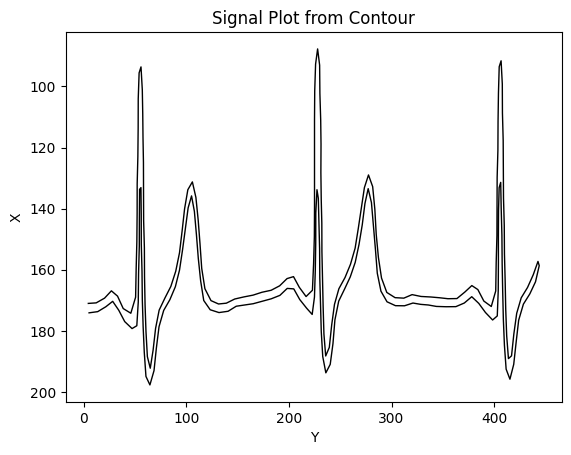

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'test' contains the resized contour coordinates
# Convert contour to a dataframe with columns 'X' and 'Y'
df = pd.DataFrame(test, columns=['X', 'Y'])

# Create a new figure for plotting the signal
fig5, ax5 = plt.subplots()

# Invert y-axis for correct orientation
plt.gca().invert_yaxis()

# Plot the signal (X vs Y)
ax5.plot(df['Y'], df['X'], linewidth=1, color='black', linestyle='solid')

# Set title and axis labels (assuming appropriate details)
ax5.set_title("Signal Plot from Contour")
ax5.set_xlabel("Y")
ax5.set_ylabel("X")

# Save the plot as an image file (PNG format)
fig5.savefig('Lead13_Signal.png')

# Show the plot (optional, depending on your preference)
plt.show()


In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'test' contains the resized contour coordinates
# Convert contour to a dataframe with columns 'X' and 'Y'
df = pd.DataFrame(test, columns=['X', 'Y'])

# Save the dataframe to a CSV file
df.to_csv('data.csv', index=False)

# View the CSV data for verification
test_df = pd.read_csv('data.csv')

# Display the contents of the CSV dataframe
print("CSV Data:")
print(test_df)


CSV Data:
              X          Y
0    171.008540   4.296922
1    170.836114  11.960319
2    169.284475  20.150893
3    166.891190  26.796179
4    168.626077  32.780481
..          ...        ...
250  173.262298  34.010550
251  170.332105  28.060331
252  172.107495  21.352865
253  173.705428  13.455369
254  174.094709   5.023097

[255 rows x 2 columns]


In [33]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming 'df' contains the dataframe with contour coordinates 'X' and 'Y'
# Create MinMaxScaler instance
scaler = MinMaxScaler()

# Scale and normalize the 'X' and 'Y' columns using MinMaxScaler
fit_transform_data = scaler.fit_transform(df)

# Create a new dataframe to store the normalized scaled data
Normalized_Scaled = pd.DataFrame(fit_transform_data, columns=['X', 'Y'])

# Display the normalized scaled data
print("Normalized Scaled Data:")
print(Normalized_Scaled)


Normalized Scaled Data:
            X         Y
0    0.757389  0.000000
1    0.755821  0.017426
2    0.741712  0.036050
3    0.719949  0.051161
4    0.735725  0.064769
..        ...       ...
250  0.777882  0.067566
251  0.751238  0.054036
252  0.767381  0.038784
253  0.781911  0.020825
254  0.785451  0.001651

[255 rows x 2 columns]


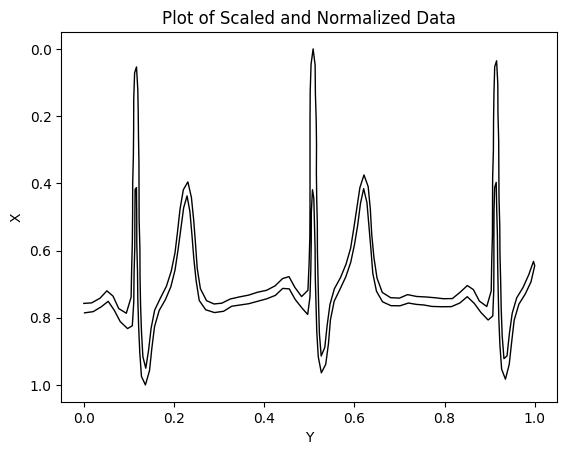

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'Normalized_Scaled' contains the scaled and normalized dataframe
# Create a dataframe from 'Normalized_Scaled' with specified column names ('X' and 'Y')
df = pd.DataFrame(Normalized_Scaled, columns=['X', 'Y'])

# Create a new figure and axis for plotting
fig6, ax6 = plt.subplots()

# Invert y-axis for correct orientation (assuming desired orientation)
plt.gca().invert_yaxis()

# Plot the scaled and normalized data ('Y' vs 'X')
ax6.plot(Normalized_Scaled['Y'], Normalized_Scaled['X'], linewidth=1, color='black', linestyle='solid')

# Set title and axis labels for the plot
ax6.set_title("Plot of Scaled and Normalized Data")
ax6.set_xlabel("Y")
ax6.set_ylabel("X")

# Show the plot
plt.show()


In [35]:
import pandas as pd

# Assuming 'Normalized_Scaled' contains the scaled and normalized dataframe
# Save the scaled and normalized data to a CSV file named 'scaled_data.csv'
Normalized_Scaled.to_csv('scaled_data.csv', index=False)

# Read the CSV file back into a dataframe for verification
test_scaled_df = pd.read_csv('scaled_data.csv')

# Display the contents of the scaled data dataframe
print("Scaled Data from CSV:")
print(test_scaled_df)


Scaled Data from CSV:
            X         Y
0    0.757389  0.000000
1    0.755821  0.017426
2    0.741712  0.036050
3    0.719949  0.051161
4    0.735725  0.064769
..        ...       ...
250  0.777882  0.067566
251  0.751238  0.054036
252  0.767381  0.038784
253  0.781911  0.020825
254  0.785451  0.001651

[255 rows x 2 columns]


In [36]:
import pandas as pd

# Assuming 'Normalized_Scaled' contains the scaled and normalized dataframe
# Extract the 'X' axis data and save it to a CSV file named 'scaled_data_X.csv'
Normalized_Scaled['X'].to_csv('scaled_data_X.csv', index=False, header=['X'])

# Read the CSV file back into a dataframe for verification
test_scaled_df_X = pd.read_csv('scaled_data_X.csv')

# Display the shape (dimensions) of the dataframe containing 'X' axis data
print("Shape of 'X' Axis Data from CSV:", test_scaled_df_X.shape)


Shape of 'X' Axis Data from CSV: (255, 1)


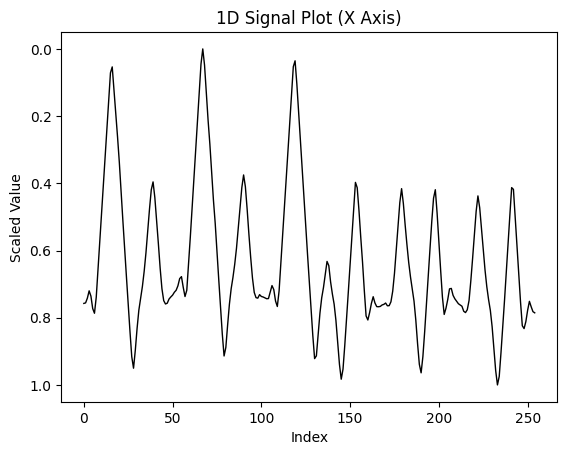

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'test_scaled_df_X' contains the dataframe with 'X' axis data
# Create a dataframe for plotting with specified column name ('X')
test_plot_df = pd.DataFrame(test_scaled_df_X, columns=['X'])

# Create a new figure and axis for plotting the 1D signal
fig6, ax6 = plt.subplots()

# Invert y-axis for correct orientation (assuming desired orientation)
plt.gca().invert_yaxis()

# Plot the 1D signal ('X' axis data)
ax6.plot(test_plot_df['X'], linewidth=1, color='black', linestyle='solid')

# Set title and axis labels for the plot
ax6.set_title("1D Signal Plot (X Axis)")
ax6.set_xlabel("Index")
ax6.set_ylabel("Scaled Value")

# Show the plot
plt.show()

In [40]:
import pandas as pd

# Assuming 'test_scaled_df_X' contains the dataframe with 'X' axis data
# Transpose the 1D scaled dataframe to switch rows and columns
test_transpose = test_scaled_df_X.T

# Display the transposed dataframe
test_transpose


0         1         2         3         4         5         6    \
X  0.757389  0.755821  0.741712  0.719949  0.735725  0.772699  0.786687   

        7         8         9    ...       245       246       247       248  \
X  0.738789  0.655209  0.574138  ...  0.668437  0.753336  0.823834  0.832318   

        249       250       251       252       253       254  
X  0.811514  0.777882  0.751238  0.767381  0.781911  0.785451  

[1 rows x 255 columns]